In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import ceil

# Example 1

In [2]:
def d_p1(x,y):
    if y <= 0:      
        d = (-10-x)**2 + (-10-y)**2
    elif x < 0 and y > 0:      
        d = None
    else:
        if x > y:
            d = (-10-x)**2 + (-10-y)**2
        else:
            d = ((2**.5 * 10) + (x**2+y**2)**.5)**2
    return d

def d_p2(x,y,w):
    if y <= 0:      
        if w * x - y > 0:
            d = (1-x)**2 + (w-y)**2
        else:
            d = ((1**2+w**2)**.5 + (x**2+y**2)**.5)**2
    elif x < 0 and y > 0:      
        d = None
    else:
        d = (1-x)**2 + (w-y)**2
    return d

def frechet_function(x,y,w=7):
    if x < 0 and y > 0 :
        return None
    frechet = (d_p1(x,y) + d_p2(x,y,1) + d_p2(x,y,3) + d_p2(x,y,w)) / 4
    return frechet 

def frechet_derivative(x,y,w=7):
    frechet_derivative = (d_p1(x,y) - (x**2+y**2) - (10**2 + 10 **2))/ (2 *(x**2+y**2))
    frechet_derivative += (d_p2(x,y,1) - (x**2+y**2) - (1 + 1))/ (2 *(x**2+y**2))
    frechet_derivative += (d_p2(x,y,3) - (x**2+y**2) - (1 + 3 **2))/ (2 *(x**2+y**2))
    frechet_derivative += (d_p2(x,y,w) - (x**2+y**2) - (1 + w **2))/ (2 *(x**2+y**2))
    frechet_derivative = frechet_derivative / 4
    return frechet_derivative

def plot_frechet_combined(W):
    b = int(ceil(max([W,10]) + .5))
    X = list(np.arange(-b,b,0.05))
    Y = list(np.arange(b,-b,-0.05))
    Z = np.zeros((len(X),len(Y)))
    for i,x in enumerate(X):
        for j,y in enumerate(Y):
            Z[i,j] = frechet_function(x,y,w=W)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
    
    #from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show
    ax1.imshow(Z.T,cmap="Blues",extent=(-b,b,-b,b),zorder=1)
    ax1.fill_between([-b,0], [0,0], [b,b],color="grey", alpha = .3,ls="-")
    ax1.contour(X,Y,Z,np.arange(0,300,20),linewidths=1,cmap="gray",zorder=2, alpha=.7)
    ax1.scatter([-10,1,1,1],[-10,1,3,W], c="black",zorder=3)

    ax1.annotate(r'$T_4$',(-9.5,-10))
    ax1.annotate(r'$T_3$',(1.5,1))
    ax1.annotate(r'$T_2$',(1.5,3))
    ax1.annotate(r'$T_1$',(1.5,W))
    
    ax1.plot([-b,b], [0,0], c='black')
    ax1.plot([0,0], [-b,b], c='black')
    
    for i in range(0, 2*b, 1):
        if i <= b:
            ax1.plot([-b+i,0],[b,i],color="black",alpha=.3)
        else:
            j = i-b
            ax1.plot([-b,-j],[b-j,0],color="black",alpha=.3)
    ax1.axis("off")
    ax1.set_title("Frechet Function")
    theta = list(np.arange(-np.pi, np.pi/2, .05))
    derivs = []
    for angle in theta:
        deriv  = frechet_derivative(np.cos(angle), np.sin(angle), w = W)
        derivs.append(deriv)
    
    ax2.plot(theta, derivs)
    #ax2.set_xticks([-np.pi,-np.pi/2,0,np.pi/2],["$-\pi$","$-\pi/2$","$0$","$\pi/2$"])
    ax2.set_xticks([-np.pi,-3*np.pi/4,-np.pi/2,0,np.pi/2],["$-\pi$","mean","$-\pi/2$","$0$","$\pi/2$"])
    ax2.set_title("Directional Derivatives of the Frechet Function at 0")
    plt.show()

<>:79: SyntaxWarning: invalid escape sequence '\p'
<>:79: SyntaxWarning: invalid escape sequence '\p'
<>:79: SyntaxWarning: invalid escape sequence '\p'
<>:79: SyntaxWarning: invalid escape sequence '\p'
<>:79: SyntaxWarning: invalid escape sequence '\p'
<>:79: SyntaxWarning: invalid escape sequence '\p'
/var/folders/1b/vrz7w3kj2pg00vvhsyfwn8_c0000gn/T/ipykernel_43738/1448332955.py:79: SyntaxWarning: invalid escape sequence '\p'
  ax2.set_xticks([-np.pi,-3*np.pi/4,-np.pi/2,0,np.pi/2],["$-\pi$","mean","$-\pi/2$","$0$","$\pi/2$"])
/var/folders/1b/vrz7w3kj2pg00vvhsyfwn8_c0000gn/T/ipykernel_43738/1448332955.py:79: SyntaxWarning: invalid escape sequence '\p'
  ax2.set_xticks([-np.pi,-3*np.pi/4,-np.pi/2,0,np.pi/2],["$-\pi$","mean","$-\pi/2$","$0$","$\pi/2$"])
/var/folders/1b/vrz7w3kj2pg00vvhsyfwn8_c0000gn/T/ipykernel_43738/1448332955.py:79: SyntaxWarning: invalid escape sequence '\p'
  ax2.set_xticks([-np.pi,-3*np.pi/4,-np.pi/2,0,np.pi/2],["$-\pi$","mean","$-\pi/2$","$0$","$\pi/2$"])


In [18]:
def plot_frechet(W):
    plt.rcParams.update({"text.usetex": True, "font.family": "Helvetica"})
    b = int(ceil(max([W+1,10]) + .5))
    X = list(np.arange(-b,b,0.05))
    Y = list(np.arange(b,-b,-0.05))
    Z = np.zeros((len(X),len(Y)))
    for i,x in enumerate(X):
        for j,y in enumerate(Y):
            Z[i,j] = frechet_function(x,y,w=W)
    fig, ax1 = plt.subplots(1, 1, figsize=(5,5))
    
    #from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show
    ax1.imshow(Z.T,cmap="Blues",extent=(-b,b,-b,b),zorder=1, alpha=.7)
    ax1.fill_between([-b,0], [0,0], [b,b],color="grey", alpha = .3,ls="-")
    ax1.contour(X,Y,Z,np.arange(0,300,20),linewidths=1,cmap="gray",zorder=2, alpha=.5)
    ax1.scatter([-10,1,1,1],[-10,1,3,W], c="black",zorder=3)

    ax1.annotate(r'$T_4 = (10,10)$',(-9.5,-10), size=16,zorder=4)
    ax1.annotate(r'$T_3 = (1,1)$',(1.5,1), size=16,zorder=4)
    ax1.annotate(r'$T_2 = (1,3)$',(1.5,3), size=16,zorder=4)
    ax1.annotate(r'$T_1 = (1,w)$',(1.5,W), size=16,zorder=4)

    ax1.annotate(r'$s_1$',(0.3,b-1), size=16,zorder=4)
    ax1.annotate(r'$s_2$',(b-1.5,-1), size=16,zorder=4)
    ax1.annotate(r'$s_3$',(0.3,-b+1), size=16,zorder=4)
    ax1.annotate(r'$s_4$',(-b+1,-1), size=16,zorder=4)
    
    theta = list(np.arange(-np.pi, np.pi/2, .05))
    plt.plot(5 * np.cos(theta),  5 * np.sin(theta), color="crimson", alpha=1, zorder=2)
    #ax1.annotate(r'$\mathbb{L}_4$',(3,-3), size=16,zorder=4, color="crimson")

    
    plt.arrow(0,0,b-.4,0, color='black',zorder=4,head_width=.5,head_length=.4)
    plt.arrow(0,0,-b+.4,0, color='black',zorder=4,head_width=.5,head_length=.4)
    plt.arrow(0,0,0,b-.4, color='black',zorder=4,head_width=.5,head_length=.4)
    plt.arrow(0,0,0,-b+.4, color='black',zorder=4,head_width=.5,head_length=.4)

    #ax1.plot([-b,b], [0,0], c='black')
    #ax1.plot([0,0], [-b,b], c='black')

    for i in range(0, 2*b, 1):
        if i <= b:
            ax1.plot([-b+i,0],[b,i],color="black",alpha=.3)
        else:
            j = i-b
            ax1.plot([-b,-j],[b-j,0],color="black",alpha=.3)
    ax1.axis("off")
    #ax1.set_title("Frechet Function")
    plt.savefig("ex_frechfunc.pdf")
    plt.show()

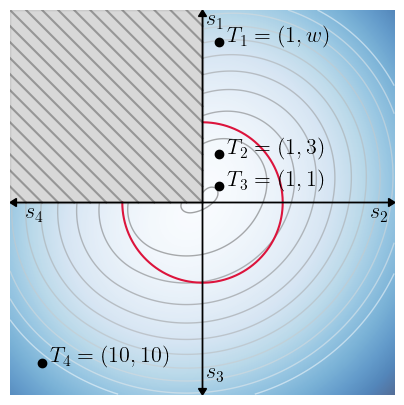

In [19]:
W = 10
plot_frechet(W)

In [26]:
def plot_frechet_derivs(W):
    plt.rcParams.update({"text.usetex": True, "font.family": "Helvetica"})
    fig, ax1 = plt.subplots(1, 1, figsize=(5,5))
    
    theta = list(np.arange(-np.pi, np.pi/2, .05))
    derivs = []
    for angle in theta:
        deriv  = frechet_derivative(np.cos(angle), np.sin(angle), w = W)
        derivs.append(deriv)

    
    ax1.plot(theta, derivs)

    #ax2.set_xticks([-np.pi,-np.pi/2,0,np.pi/2],["$-\pi$","$-\pi/2$","$0$","$\pi/2$"])
    ax1.set_xticks([-np.pi,-np.pi/2,0,np.pi/2],[r"$s_4$",r"$s_3$",r"$s_2$",r"$s_1$"], fontsize=16)
    ax1.set_yticks([0],[r"$0$"], fontsize=16)
    #ax1.plot([-np.pi,np.pi/2],[0,0], color="crimson", alpha=1)

    
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    ax1.spines['left'].set_visible(False)
    ax1.spines['bottom'].set_visible(False)

    #ax1.set_title("Directional Derivatives of the Frechet Function at 0")
    plt.grid(visible=True)
    plt.grid(axis='y', color='crimson' )
    plt.savefig("ex_derivs.pdf")
    plt.show()

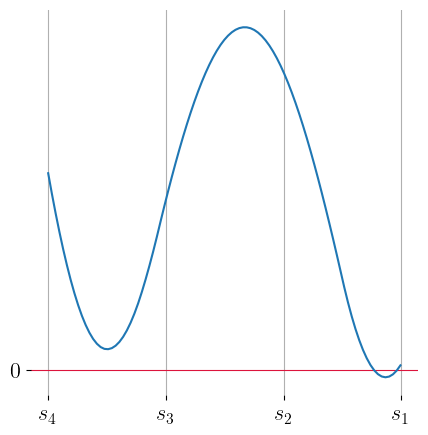

In [27]:
plot_frechet_derivs(W)

# Proof of Theorem 1

In [139]:
def plot_case1():
    plt.rcParams.update({"text.usetex": True, "font.family": "Helvetica"})
    b = 10
    X = list(np.arange(-b,b,0.05))
    Y = list(np.arange(b,-b,-0.05))
    fig, ax1 = plt.subplots(1, 1, figsize=(5,5))
    
    ax1.fill_between([-b,0], [0,0], [b,b],color="grey", alpha = .3,ls="-")
    ax1.scatter([5],[0], c="royalblue",zorder=3)
    ax1.plot([0,5],[0,0], c="royalblue",ls = '--', lw =2, zorder =2)

    ax1.annotate(r'$\mu$',(5.5,-1), size=16,zorder=3, color='royalblue')

    ax1.annotate(r'$s$',(0.3,b-1), size=16,zorder=3, color='black')

    theta = np.linspace(0.0 * np.pi, 0.5 *np.pi, 100)
    x_ang = 3 * np.cos(theta)
    y_ang = 3 * np.sin(theta)
    ax1.plot(x_ang, y_ang, c="orange", alpha=1, lw=1, zorder=0)
    ax1.fill_between(
        [0] + x_ang.tolist()[::-1],
        [0] + y_ang.tolist()[::-1],
        color="orange",
        alpha=0.3,
        zorder=0,
    )
    ax1.annotate(r'$\pi/2$',(.4,.6), size=12,zorder=3, color='black')

    
    plt.arrow(0,0,b-.4,0, color='black',zorder=1,head_width=.5,head_length=.4)
    plt.arrow(0,0,-b+.4,0, color='black',zorder=1,head_width=.5,head_length=.4)
    plt.arrow(0,0,0,b-.4, color='black',zorder=1,head_width=.5,head_length=.4)
    plt.arrow(0,0,0,-b+.4, color='black',zorder=1,head_width=.5,head_length=.4)
    
    plt.arrow(5,0,0,2, color='crimson',zorder=1,head_width=.5,head_length=.4)
    ax1.annotate(r'$\mu + \lambda \cdot s$',(5.5,1.5), size=16,zorder=3, color='crimson')


    for i in range(0, 2*b, 1):
        if i <= b:
            ax1.plot([-b+i,0],[b,i],color="black",alpha=.3)
        else:
            j = i-b
            ax1.plot([-b,-j],[b-j,0],color="black",alpha=.3)
    ax1.axis("off")
    plt.savefig("case_1.pdf")
    plt.show()

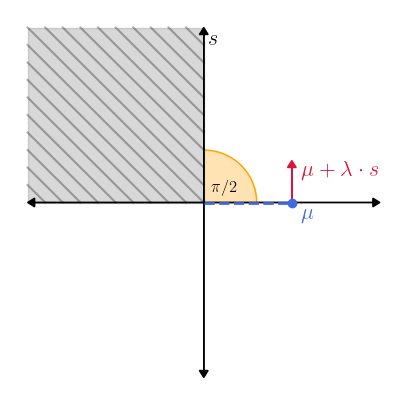

In [140]:
plot_case1()

In [145]:
def plot_case3():
    plt.rcParams.update({"text.usetex": True, "font.family": "Helvetica"})
    b = 10
    X = list(np.arange(-b,b,0.05))
    Y = list(np.arange(b,-b,-0.05))
    fig, ax1 = plt.subplots(1, 1, figsize=(5,5))
    
    ax1.fill_between([-b,0], [0,0], [b,b],color="grey", alpha = .3,ls="-")
    ax1.scatter([5],[-5], c="royalblue",zorder=3)
    ax1.scatter([5],[0], c="crimson",zorder=3)
    ax1.plot([0,5],[0,-5], c="royalblue",ls = '--', lw =2, zorder =2)

    ax1.annotate(r'$\mu$',(5.5,-6), size=16,zorder=3, color='royalblue')
    ax1.annotate(r'$\tilde{\mu}$',(5.5,-1.3), size=16,zorder=3, color='crimson')

    ax1.annotate(r'$s$',(0.3,b-1), size=16,zorder=3, color='black')

    theta = np.linspace(-.25 * np.pi, 0.5 *np.pi, 100)
    x_ang = 3 * np.cos(theta)
    y_ang = 3 * np.sin(theta)
    ax1.plot(x_ang, y_ang, c="orange", alpha=1, lw=1, zorder=0)
    ax1.fill_between(
        [0] + x_ang.tolist()[::1],
        [0] + y_ang.tolist()[::1],
        color="orange",
        alpha=0.3,
        zorder=0,
    )
    ax1.annotate(r'$>\pi/2$',(.2,.6), size=12,zorder=3, color='black')

    
    plt.arrow(0,0,b-.4,0, color='black',zorder=1,head_width=.5,head_length=.4)
    plt.arrow(0,0,-b+.4,0, color='black',zorder=1,head_width=.5,head_length=.4)
    plt.arrow(0,0,0,b-.4, color='black',zorder=1,head_width=.5,head_length=.4)
    plt.arrow(0,0,0,-b+.4, color='black',zorder=1,head_width=.5,head_length=.4)

    plt.arrow(5,0,0,2, color='crimson',zorder=1,head_width=.5,head_length=.4)
    ax1.annotate(r'$\tilde{\mu} + \lambda \cdot s$',(5.5,1.5), size=16,zorder=3, color='crimson')
    ax1.plot([5,5], [-5,0], c="crimson", alpha=1, lw=1.3, zorder=0, ls = '--')

    for i in range(0, 2*b, 1):
        if i <= b:
            ax1.plot([-b+i,0],[b,i],color="black",alpha=.3)
        else:
            j = i-b
            ax1.plot([-b,-j],[b-j,0],color="black",alpha=.3)
    ax1.axis("off")
    plt.savefig("case_3.pdf")
    plt.show()

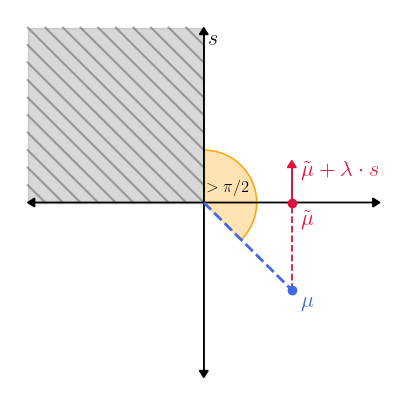

In [146]:
plot_case3()